In [9]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy as cp

In [10]:
## plots given tour
def plot_tour(tour):
    tp = len(tour)
    for ip in range(tp-1):
        start=tour[ip]
        end=tour[ip+1]
        plt.plot([start[0], end[0]],[start[1], end[1]],'ro-')
    start=tour[0]
    end=tour[1]
    plt.plot([start[0], end[0]],[start[1], end[1]],'bo-')
    start=tour[tp-2]
    end=tour[tp-1]
    plt.plot([start[0], end[0]],[start[1], end[1]],'go-')
    plt.show()

## calculates the distance between two nodes
def dist(c1, c2):
    return round(np.linalg.norm(c1-c2),2)

## calculate the cost of the given tour
def tour_cost(tour):
    t = len(tour)
    l = 0
    for i in range(t-1):
        l += dist(tour[i], tour[i+1])
    return l

## gives the nearest city in the map to the given city
## city : given city
## city_map : city map
def find_min(city, city_map):
    minimum = 100
    target = 0
    for i, c in enumerate(city_map):
        if minimum > dist(city, c):
            target = i
            minimum = dist(city, c)
    return target, minimum

## gives the farthest city in the map to the given city
## city : given city
## city_map : city map
def find_max(city, city_map):
    maximum = 0
    target = 0
    for i, c in enumerate(city_map):
        if maximum < dist(city, c):
            target = i
            maximum = dist(city, c)
    return target, maximum

### finds tour acccording to the nearest insertion
## index : initial city
## city_map : city map
def nearest_insertion(index, city_map):
    #1 starts with a subgraph consisting of initial city only
    city = city_map[index]
    city_map.pop(index)
    tour = [city]
    #2 finds a city such that distance to the initial city is minimal and forms subtour
    index,_ = find_min(city, city_map)
    city = city_map[index]
    tour.append(city)
    city_map.pop(index)
    tour.append(tour[0])
    #3,4 selection and insertion
    while len(city_map) > 0:
        #selection step
        min_dis=100
        closest_city=-1
        for i, c in enumerate(city_map):
            _, closest_distance = find_min(c, tour)
            if min_dis > closest_distance:
                min_dis = closest_distance
                closest_city = i
        city = city_map[closest_city]
        city_map.pop(closest_city)
        #insertion step
        min_cost=200
        start_node=-1
        t = len(tour)
        l = 0
        for i in range(t-1):
            cost=dist(tour[i], city)+dist(city, tour[i+1])-dist(tour[i], tour[i+1])
            if min_cost > cost:
                min_cost = cost
                start_node=i
        new_tour=cp(tour[0:(start_node+1)])
        new_tour.append(city)
        new_tour[(start_node+2):(t+1)]=cp(tour[(start_node+1):t])
        tour=cp(new_tour)
    plot_tour(tour)
    return tour

### finds tour acccording to the farthest insertion
## index : initial city
## city_map : city map
def farthest_insertion(index, city_map):
    #1 starts with a subgraph consisting of initial city only
    city = city_map[index]
    city_map.pop(index)
    tour = [city]
    #2 inds a city such that distance to the initial city is maximal and forms subtour
    index,_ = find_max(city, city_map)
    city = city_map[index]
    tour.append(city)
    city_map.pop(index)
    tour.append(tour[0])
    #3,4 selection and insertion
    while len(city_map) > 0:
        #selection step
        max_dis=0
        farthest_city=-1
        for i, c in enumerate(city_map):
            _, farthest_distance = find_max(c, tour)
            if max_dis < farthest_distance:
                max_dis = farthest_distance
                farthest_city = i
        city = city_map[farthest_city]
        city_map.pop(farthest_city)
        #insertion step
        min_cost=200
        start_node=-1
        t = len(tour)
        l = 0
        for i in range(t-1):
            cost=dist(tour[i], city)+dist(city, tour[i+1])-dist(tour[i], tour[i+1])
            if min_cost > cost:
                min_cost = cost
                start_node=i
        new_tour=cp(tour[0:(start_node+1)])
        new_tour.append(city)
        new_tour[(start_node+2):(t+1)]=cp(tour[(start_node+1):t])
        tour=cp(new_tour)
    plot_tour(tour)
    return tour

### solves tsp problem wrt mode
## file : data file name
## opt_file : optimum solution file
## initial : start costumer
## mode : switch nearest insertion or farthest insertion
def solve_tsp(file, opt_file, initial,mode=0):
    data = np.loadtxt(file)
    data = list(data[:, 1:3])
    index = np.loadtxt(opt_file).astype(int)
    opt_tour = [data[i-1] for i in index]
    opt_cost = tour_cost(opt_tour)    
    if mode == 0:
        tour = nearest_insertion(initial-1,data)
    else:
        tour = farthest_insertion(initial-1,data)
    return tour, opt_tour

## does swap operation
## i : first choice
## j : second choice
def two_opt(tour,i,j):
    new_tour = cp(tour)
    new_tour[i:j+1] = list(reversed(new_tour[i:j+1]))
    return new_tour

## applies two opt improvement
## tour : given tour
## candidate : holding best neighbor
## new_cost : holding new best cost
def improve(tour):
    cost = tour_cost(tour)
    candidate = cp(tour)
    br = 1
    while(1):
        for node1 in range(1,len(tour)-2):
            for node2 in range(node1+1,len(tour)-1):
                if ((node1!=1) | (node2!=len(tour)-2)): 
                    new_tour = two_opt(tour,node1,node2)
                    new_cost = tour_cost(new_tour)
                    if new_cost < cost:
                        cost = new_cost
                        candidate = cp(new_tour)
                        br=0
        tour = cp(candidate)
        if br == 1:
            break
        else:
            br = 1      
    plot_tour(tour)
    return cost

NEAREST INSERTION

******************************************************************************************************
Data/eil51.dat 10


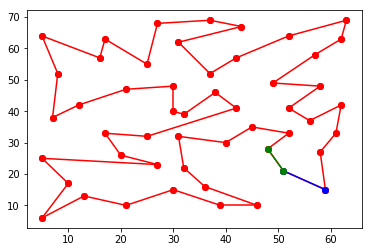

opt_cost: 429.97  cost: 488.17 =====>>> rate: 0.13535828081


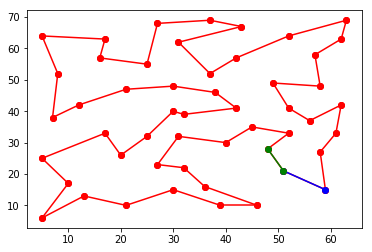

opt_cost: 429.97  improve_cost: 463.19 =====>>> rate: 0.0772612042701
Improvement: 0.0580970765402
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil51.dat 20


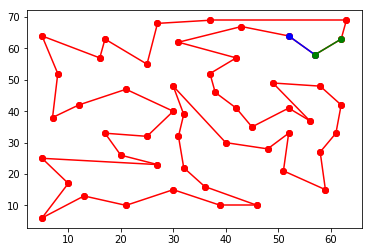

opt_cost: 429.97  cost: 514.37 =====>>> rate: 0.196292764611


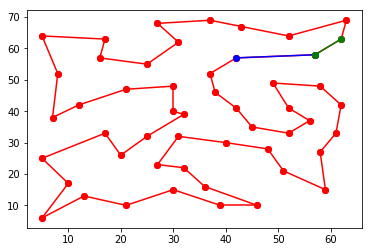

opt_cost: 429.97  improve_cost: 446.72 =====>>> rate: 0.0389562062469
Improvement: 0.157336558365
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil51.dat 30


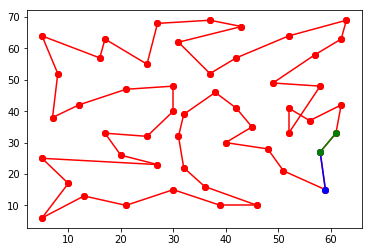

opt_cost: 429.97  cost: 490.19 =====>>> rate: 0.140056282996


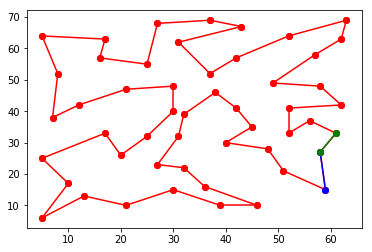

opt_cost: 429.97  improve_cost: 467.09 =====>>> rate: 0.0863316045305
Improvement: 0.0537246784659
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil76.dat 10


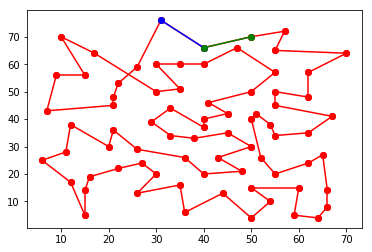

opt_cost: 545.34  cost: 636.18 =====>>> rate: 0.166574980746


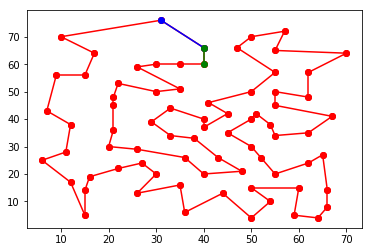

opt_cost: 545.34  improve_cost: 591.38 =====>>> rate: 0.0844243957898
Improvement: 0.0821505849562
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil76.dat 20


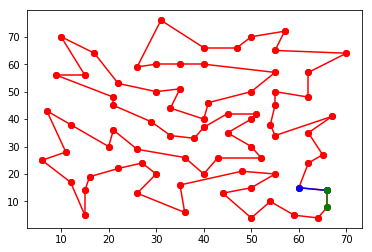

opt_cost: 545.34  cost: 614.77 =====>>> rate: 0.127315069498


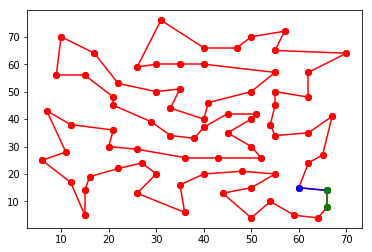

opt_cost: 545.34  improve_cost: 597.3 =====>>> rate: 0.0952800088018
Improvement: 0.0320350606961
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil76.dat 30


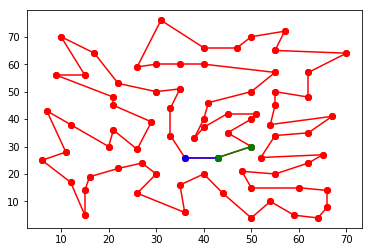

opt_cost: 545.34  cost: 626.44 =====>>> rate: 0.148714563392


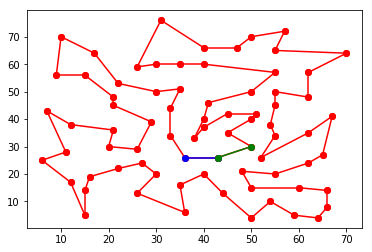

opt_cost: 545.34  improve_cost: 614.84 =====>>> rate: 0.127443429787
Improvement: 0.0212711336047
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil101.dat 10


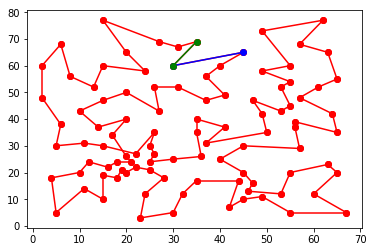

opt_cost: 642.23  cost: 728.31 =====>>> rate: 0.134032978839


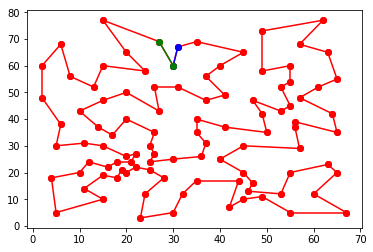

opt_cost: 642.23  improve_cost: 701.01 =====>>> rate: 0.0915248431247
Improvement: 0.0425081357146
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil101.dat 20


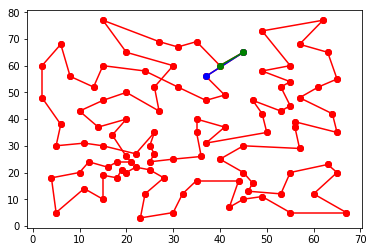

opt_cost: 642.23  cost: 735.82 =====>>> rate: 0.145726608847


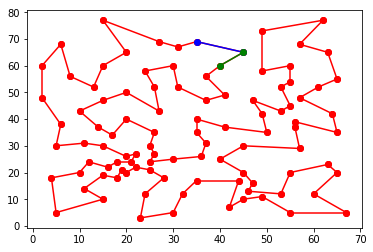

opt_cost: 642.23  improve_cost: 694.41 =====>>> rate: 0.0812481509739
Improvement: 0.0644784578733
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil101.dat 30


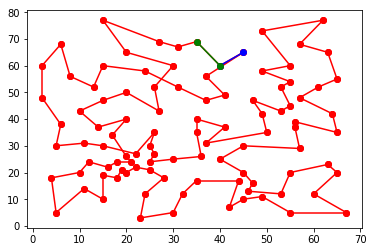

opt_cost: 642.23  cost: 735.82 =====>>> rate: 0.145726608847


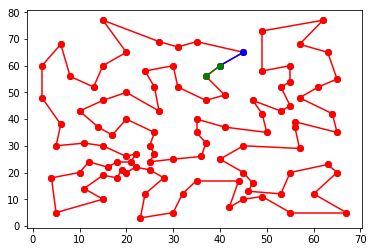

opt_cost: 642.23  improve_cost: 694.41 =====>>> rate: 0.0812481509739
Improvement: 0.0644784578733
-------------------------------------------------------------------------------


In [11]:
file_list = ['Data/eil51.dat','Data/eil76.dat','Data/eil101.dat']
opt_file_list = ['Data/eil51opt.dat','Data/eil76opt.dat','Data/eil101opt.dat']
initial_list = [10,20,30]
for i in range(3):
    file = file_list[i]
    opt_file = opt_file_list[i]
    for initial in initial_list:
        print("******************************************************************************************************")
        print(file,initial)
        tour, opt_tour = solve_tsp(file,opt_file, initial,mode=0)
        cost = tour_cost(tour)
        opt_cost = tour_cost(opt_tour)
        rate = (cost-opt_cost)/opt_cost
        print('opt_cost:',opt_cost,' cost:',cost,'=====>>>','rate:',rate)
        cost = improve(tour)
        new_rate = (cost-opt_cost)/opt_cost
        print('opt_cost:',opt_cost,' improve_cost:',cost,'=====>>>','rate:',new_rate)
        print("Improvement:",rate-new_rate)
        print("-------------------------------------------------------------------------------")

FARTHEST INSERTION

******************************************************************************************************
Data/eil51.dat 10


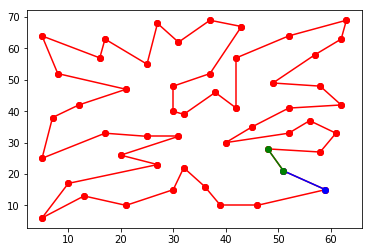

opt_cost: 429.97  cost: 489.8 =====>>> rate: 0.13914924297


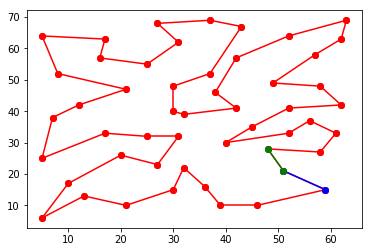

opt_cost: 429.97  improve_cost: 473.03 =====>>> rate: 0.10014652185
Improvement: 0.0390027211201
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil51.dat 20


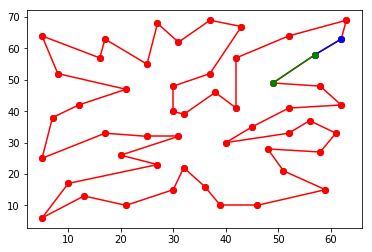

opt_cost: 429.97  cost: 489.8 =====>>> rate: 0.13914924297


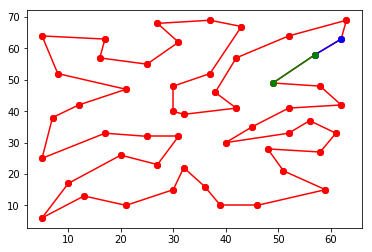

opt_cost: 429.97  improve_cost: 473.03 =====>>> rate: 0.10014652185
Improvement: 0.0390027211201
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil51.dat 30


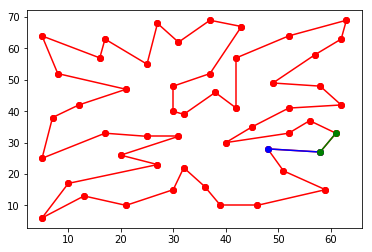

opt_cost: 429.97  cost: 489.8 =====>>> rate: 0.13914924297


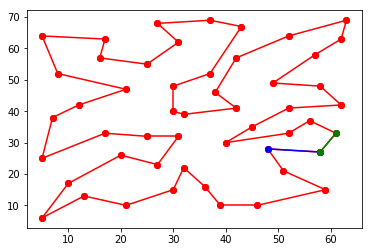

opt_cost: 429.97  improve_cost: 473.03 =====>>> rate: 0.10014652185
Improvement: 0.0390027211201
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil76.dat 10


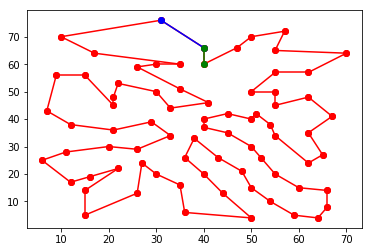

opt_cost: 545.34  cost: 598.6 =====>>> rate: 0.0976638427403


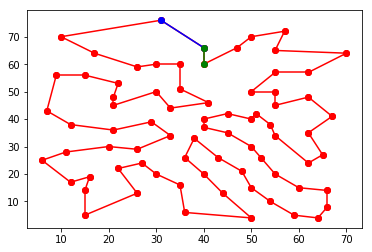

opt_cost: 545.34  improve_cost: 576.22 =====>>> rate: 0.0566252246305
Improvement: 0.0410386181098
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil76.dat 20


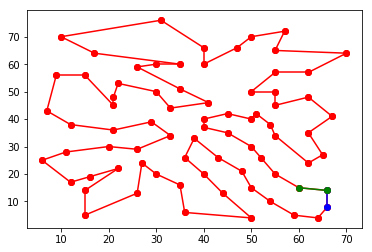

opt_cost: 545.34  cost: 598.6 =====>>> rate: 0.0976638427403


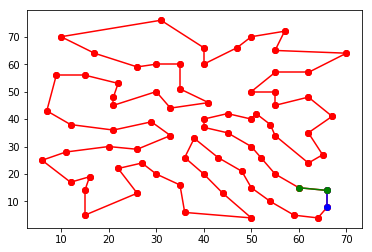

opt_cost: 545.34  improve_cost: 576.22 =====>>> rate: 0.0566252246305
Improvement: 0.0410386181098
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil76.dat 30


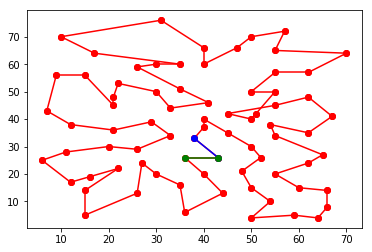

opt_cost: 545.34  cost: 604.01 =====>>> rate: 0.107584259361


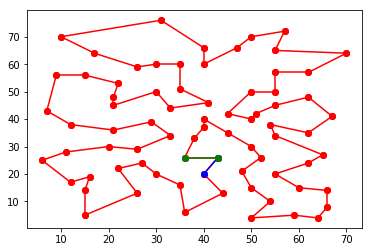

opt_cost: 545.34  improve_cost: 573.26 =====>>> rate: 0.0511974181245
Improvement: 0.0563868412367
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil101.dat 10


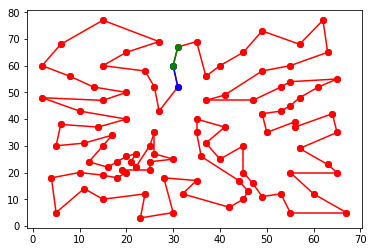

opt_cost: 642.23  cost: 724.05 =====>>> rate: 0.127399841178


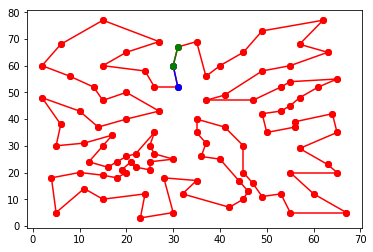

opt_cost: 642.23  improve_cost: 691.04 =====>>> rate: 0.0760008096788
Improvement: 0.0513990314996
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil101.dat 20


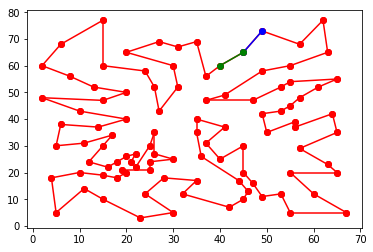

opt_cost: 642.23  cost: 723.77 =====>>> rate: 0.126963860299


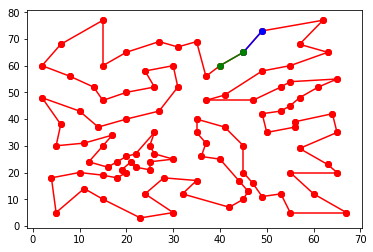

opt_cost: 642.23  improve_cost: 685.02 =====>>> rate: 0.0666272207776
Improvement: 0.0603366395217
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil101.dat 30


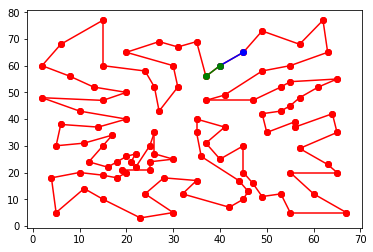

opt_cost: 642.23  cost: 723.77 =====>>> rate: 0.126963860299


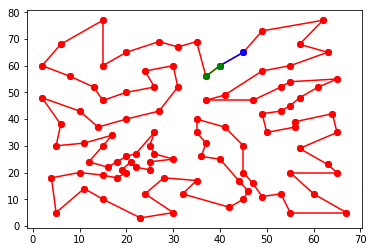

opt_cost: 642.23  improve_cost: 685.02 =====>>> rate: 0.0666272207776
Improvement: 0.0603366395217
-------------------------------------------------------------------------------


In [12]:
file_list = ['Data/eil51.dat','Data/eil76.dat','Data/eil101.dat']
opt_file_list = ['Data/eil51opt.dat','Data/eil76opt.dat','Data/eil101opt.dat']
initial_list = [10,20,30]
for i in range(3):
    file = file_list[i]
    opt_file = opt_file_list[i]
    for initial in initial_list:
        print("******************************************************************************************************")
        print(file,initial)
        tour, opt_tour = solve_tsp(file,opt_file, initial,mode=1)
        cost = tour_cost(tour)
        opt_cost = tour_cost(opt_tour)
        rate = (cost-opt_cost)/opt_cost
        print('opt_cost:',opt_cost,' cost:',cost,'=====>>>','rate:',rate)
        cost = improve(tour)
        new_rate = (cost-opt_cost)/opt_cost
        print('opt_cost:',opt_cost,' improve_cost:',cost,'=====>>>','rate:',new_rate)
        print("Improvement:",rate-new_rate)
        print("-------------------------------------------------------------------------------")